<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/Cross_Validation_Data_Loaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")

data = torch.tensor(iris[iris.columns[0:4]].values).float()

In [3]:
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8)


train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, batch_size = 12, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])


In [10]:
print('TRAINING DATA')
for batch,label in train_loader:
  print(batch,label)

TRAINING DATA
tensor([[4.4000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [4.9000, 2.5000, 4.5000, 1.7000]]) tensor([0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2])
tensor([[5.6000, 2.5000, 3.9000, 1.1000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [7.9000,

In [13]:
ANNiris = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation unit
    nn.Linear(64,3),   # output units
      )

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [17]:
numepochs = 500

def trainTheModel():

  trainAcc = []
  testAcc  = []

  for epochi in range(numepochs):

    batchAcc = []
    for X,y in train_loader:

      yHat = ANNiris(X)
      loss = lossfun(yHat,y)


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )

    trainAcc.append( np.mean(batchAcc) )

    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )


  return trainAcc,testAcc

In [21]:
trainAcc,testAcc = trainTheModel()
print(testAcc)

[93.33333373069763, 89.99999761581421, 96.66666388511658, 93.33333373069763, 93.33333373069763, 93.33333373069763, 89.99999761581421, 93.33333373069763, 96.66666388511658, 93.33333373069763, 89.99999761581421, 93.33333373069763, 93.33333373069763, 96.66666388511658, 96.66666388511658, 89.99999761581421, 96.66666388511658, 93.33333373069763, 96.66666388511658, 93.33333373069763, 96.66666388511658, 93.33333373069763, 96.66666388511658, 96.66666388511658, 96.66666388511658, 96.66666388511658, 89.99999761581421, 96.66666388511658, 93.33333373069763, 89.99999761581421, 93.33333373069763, 93.33333373069763, 96.66666388511658, 93.33333373069763, 93.33333373069763, 96.66666388511658, 93.33333373069763, 93.33333373069763, 93.33333373069763, 93.33333373069763, 93.33333373069763, 89.99999761581421, 93.33333373069763, 93.33333373069763, 96.66666388511658, 96.66666388511658, 89.99999761581421, 93.33333373069763, 96.66666388511658, 93.33333373069763, 93.33333373069763, 96.66666388511658, 93.33333373

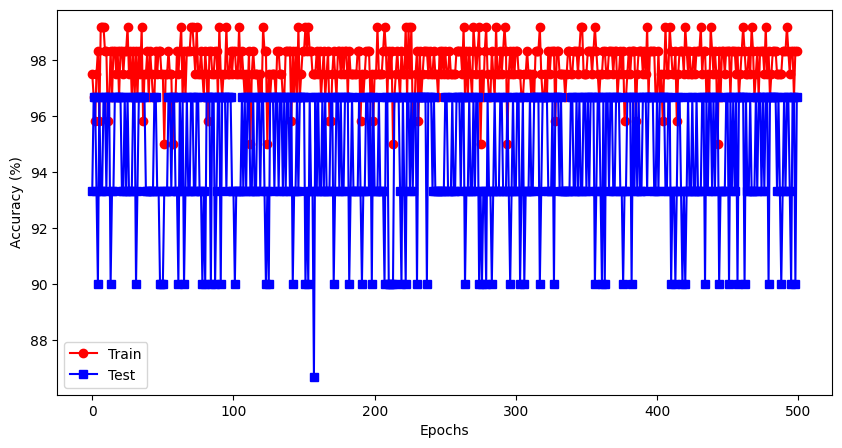

In [20]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])


plt.show()